# Assignment 5
## Task 1 : Read the dataset from the below link --
### https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

In [1]:
import pandas as pd
babynm=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
## Saving File as data is huge.
#babynm.to_csv("US_Baby_Names_right_new.csv",index=False)
#babynm=pd.read_csv('US_Baby_Names_right_new.csv')
babynm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


### 1. Delete unnamed columns

In [2]:
del babynm['Unnamed: 0']
del babynm['Id']
babynm.head(5)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### 2. Show the distribution of male and female

In [3]:
babynm['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### 3. Show the top 5 most preferred names

In [4]:
del babynm['Year']
babynm.groupby('Name').sum().sort_values('Count',ascending = 0).head()

,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


 ### 4. What is the median name occurence in the dataset

In [5]:
namegroup = babynm.groupby('Name').sum()
namegroup[namegroup.Count == namegroup.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


 ### 5. Distribution of male and female born count by states

In [6]:
babynm.groupby(by=['State','Gender'], axis = 0).sum()

Count
State Gender         
AK    F         26250
      M         37399
AL    F        215308
      M        260114
AR    F        129712
      M        162947
AZ    F        368567
      M        439691
CA    F       2414063
      M       2670584
CO    F        260805
      M        313425
CT    F        141350
      M        171397
DC    F         35276
      M         47228
DE    F         31312
      M         41748
FL    F        915422
      M       1060957
GA    F        549637
      M        635531
HI    F         37279
      M         53127
IA    F        144764
      M        174009
ID    F         72808
      M         94320
IL    F        695312
      M        791679
...               ...
OK    F        184967
      M        228613
OR    F        172111
      M        209445
PA    F        593382
      M        682709
RI    F         35560
      M         47939
SC    F        197917
      M        237442
SD    F         34104
      M         45443
TN    F        336487
      M        398615
TX    F       1786281
      M       2005394
UT    F        202892
      M        245324
VA    F        405503
      M        466873
VT    F         15079
      M         21353
WA    F        334944
      M        395377
WI    F        264921
      M        311758
WV    F         73800
      M         93557
WY    F         14107
      M         21912

[102 rows x 1 columns]

## Task 2 : We have the min and max temperatures in a city In India for each months of the year.</br>We would like to find a function to describe this and show it graphically, the dataset given below.
#### Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 </br>Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [7]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

tmax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tmin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)

### 1. fitting it to the periodic function

In [8]:
def fit_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(fit_temps, months,
                                      tmax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(fit_temps, months,
                                      tmin, [-40, 20, 0])

### 2. plot the fit

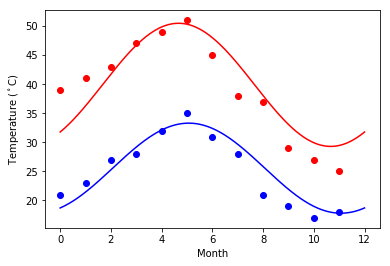

In [9]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, tmax, 'ro')
plt.plot(days, fit_temps(days, *res_max), 'r-')
plt.plot(months, tmin, 'bo')
plt.plot(days, fit_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()